In [231]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [232]:
df=pd.read_csv(r"A:\Work Docs\DATA Set\placement 3.csv")
df.shape
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


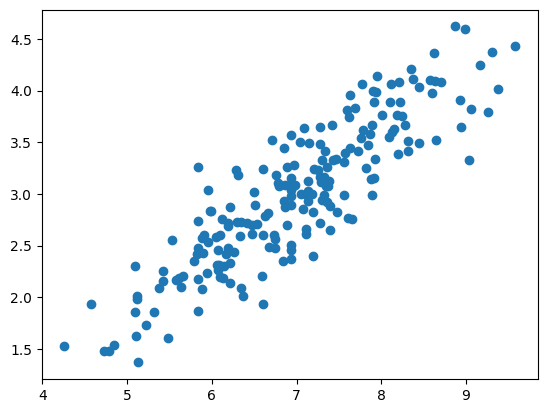

In [233]:
plt.scatter(df['cgpa'],df['package'])

In [234]:
x = df.iloc[:,0:1]
y= df.iloc[:,-1]

In [235]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2 ,random_state=2)

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
lr=LinearRegression()

In [238]:
lr.fit(x_train,y_train)

LinearRegression()

In [239]:
pd.concat([x_test,y_test],axis=1)

,cgpa,package
112,8.58,4.10
29,7.15,3.49
182,5.88,2.08
199,6.22,2.33
193,4.57,1.94
85,4.79,1.48
10,5.32,1.86
54,6.86,3.09
115,8.35,4.21
35,6.87,2.87


Checking Package value from trained model

In [240]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [241]:
lr.predict(x_test.iloc[1].values.reshape(1,1))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

In [242]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

# Showing Regression Line Drawn by Algorithm and training dataset

Text(0, 0.5, 'Package')

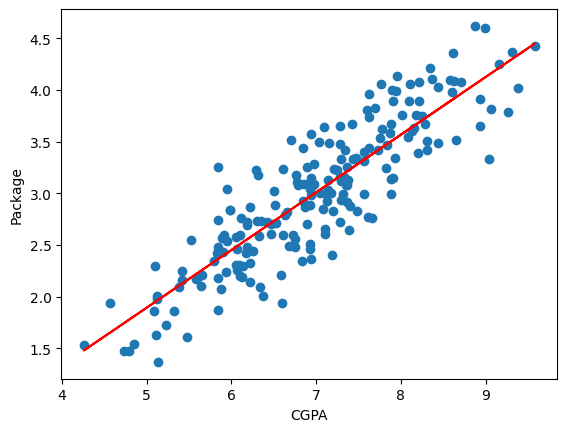

In [243]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train['cgpa'],lr.predict(x_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [244]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [245]:
y_pred=lr.predict(x_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [246]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [247]:
print('MAE:',mean_absolute_error(y_test,y_pred))

MAE: 0.2884710931878175


In [248]:
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 0.12129235313495527


In [249]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.34827051717731616


In [250]:
print('r2 score:',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

r2 score: 0.780730147510384


In [251]:
#Adjusted r2 Score
x_test.shape[0]

40

In [252]:
adj_r2_score=1-((1-r2)*(40-1)/(40-1-1))
adj_r2_score

0.7749598882343415

### effect of adding random column of r2 and adj_r2

In [253]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)

new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.773570,3.26
1,5.12,0.024983,1.98
2,7.82,0.094937,3.25
3,7.42,0.014826,3.67
4,6.94,0.215760,3.57


Text(0, 0.5, 'Package')

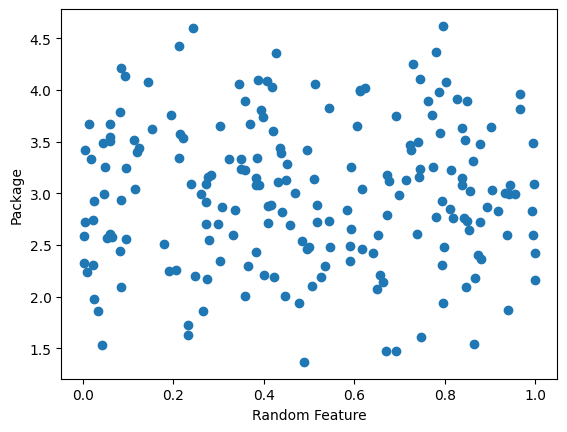

In [254]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('Random Feature')
plt.ylabel('Package')

In [255]:
x=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [256]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2 ,random_state=2)

In [257]:
lr=LinearRegression()

In [258]:
lr.fit(x_train,y_train)

LinearRegression()

In [259]:
y_pred=lr.predict(x_test)
y_pred

array([3.90800889, 3.14033672, 2.36644386, 2.62276172, 1.64897432,
       1.75067401, 2.11455338, 2.95788207, 3.80950805, 2.89748147,
       4.11848602, 3.50378592, 2.96916736, 2.41559835, 3.23541638,
       3.51109629, 1.96223582, 3.29476737, 2.93797504, 3.46966002,
       2.52556017, 3.15641295, 2.80860193, 3.07262888, 3.65837958,
       2.91068171, 3.46904916, 3.35740324, 3.93399767, 1.96065523,
       3.62118203, 3.2351686 , 3.78953841, 2.75570289, 2.764291  ,
       3.30279804, 3.54354299, 2.58004305, 2.67091001, 2.68854407])

In [260]:
print('R2 score :',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)


R2 score : 0.7835146192497765


In [261]:
adj_r2_score=1-((1-r2)*(40-1)/(40-1-2))
adj_r2_score

0.7718127067767915

Adding new column

In [262]:
new_df2= df.copy()

new_df2['iq'] = new_df2['package']+(np.random.randint(-12,12,200)/10)
new_df2=new_df2[['cgpa','iq','package']]
new_df2

,cgpa,iq,package
0,6.89,4.06,3.26
1,5.12,1.08,1.98
2,7.82,3.45,3.25
3,7.42,3.47,3.67
4,6.94,3.47,3.57
...,...,...,...
195,6.93,3.56,2.46
196,5.89,2.67,2.57
197,7.21,3.24,3.24
198,7.63,4.46,3.96


In [263]:
x=new_df2.iloc[:,0:2]
y=new_df2.iloc[:,-1]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2 ,random_state=2)

In [264]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [265]:
y_pred=lr.predict(x_test)
y_pred

array([4.09520066, 3.17741285, 2.45664042, 2.52403261, 1.60739256,
       1.79458289, 2.0779939 , 2.9623234 , 3.97043421, 3.09870085,
       3.9929027 , 3.48209729, 2.96630656, 2.54888643, 3.09526607,
       3.48074814, 1.9965751 , 3.29014853, 2.81868212, 3.40281142,
       2.71130425, 3.29414019, 2.97563903, 3.11790566, 3.65903429,
       2.82986482, 3.44964115, 3.26366287, 3.87874506, 1.85414587,
       3.80189181, 3.05931935, 3.65212593, 2.64964714, 2.64032317,
       3.25007306, 3.54743787, 2.57285817, 2.50395422, 2.86624833])

In [266]:
print('R2 score :',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

adj_r2_score=1-((1-r2)*(40-1)/(40-1-2))
print('adj r2:',adj_r2_score)

R2 score : 0.8159420466881151
adj r2: 0.8059929681307159
